# *ТМО ЛР2 ИУ5-64 Шимко Даниил*

# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.
- Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
- 
Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи
    - обработку пропусков в данных;
    - кодирование категориальных признаков;
    - масштабирование данных.ных.

## Набор данных: Boston housing dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import matplotlib.pyplot as plt
from kaggle.api.kaggle_api_extended import KaggleApi
%matplotlib inline 
sns.set(style="ticks")
pd.options.display.max_columns = None

In [2]:
kaggle_api = KaggleApi()
kaggle_api.authenticate()
kaggle_api.dataset_download_files('altavish/boston-housing-dataset', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/altavish/boston-housing-dataset


## Смотрю, что в данных

In [3]:
df = pd.read_csv('HousingData.csv')
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Проверяю типы данных

In [4]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## Проверяю значения категориальных признаков

In [5]:
df.CHAS.unique()

array([ 0., nan,  1.])

## Проверяю пропуски

In [6]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

## Заполняю пропуски в численном признаке "CRIM" в соответствии с описанием "CRIM - per capita crime rate by town"

In [7]:
df[df.CRIM == 0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


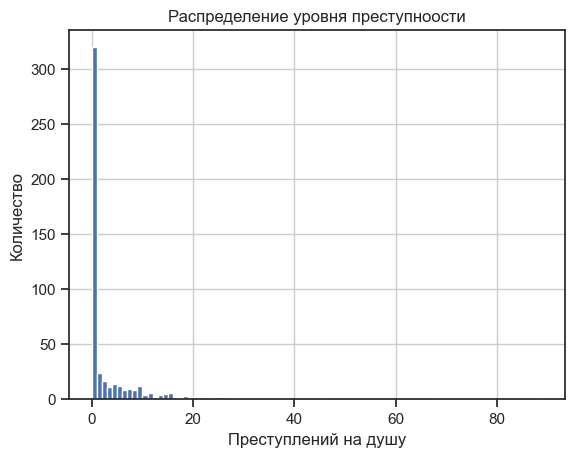

In [8]:
df.CRIM.hist(bins=range(90))
plt.title('Распределение уровня преступноости')
plt.xlabel('Преступлений на душу')
plt.ylabel('Количество')
plt.show()

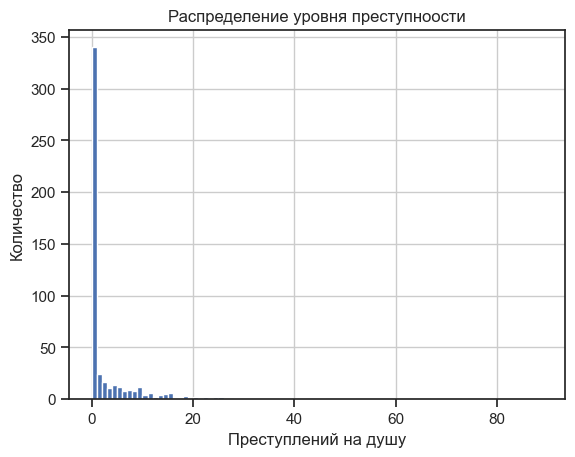

In [9]:
df = df.fillna(value={"CRIM": 0})

df.CRIM.hist(bins=range(90))
plt.title('Распределение уровня преступноости')
plt.xlabel('Преступлений на душу')
plt.ylabel('Количество')
plt.show()

## Заполняю пропуски в численном признаке "ZN" в соответствии с описанием "ZN - proportion of residential land zoned for lots over 25,000 sq.ft."

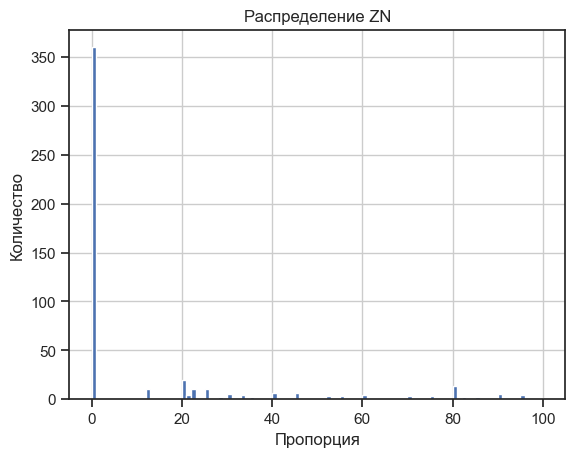

In [10]:
df.ZN.hist(bins=range(101))
plt.title('Распределение ZN')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

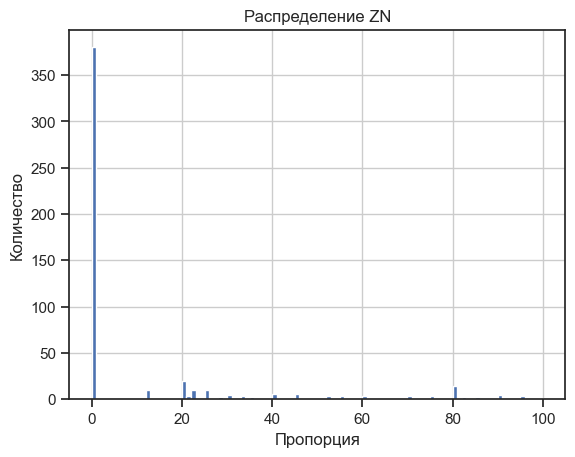

In [11]:
df = df.fillna(value={"ZN": 0})

df.ZN.hist(bins=range(101))
plt.title('Распределение ZN')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

## Заполняю пропуски в численном признаке "INDUS" в соответствии с описанием "INDUS - proportion of non-retail business acres per town."

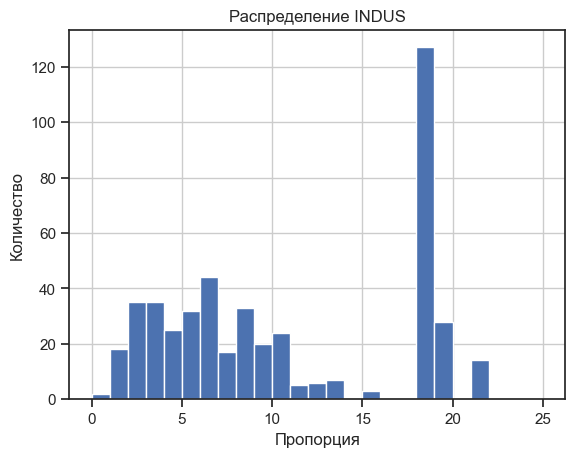

In [12]:
df.INDUS.hist(bins=range(26))
plt.title('Распределение INDUS')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

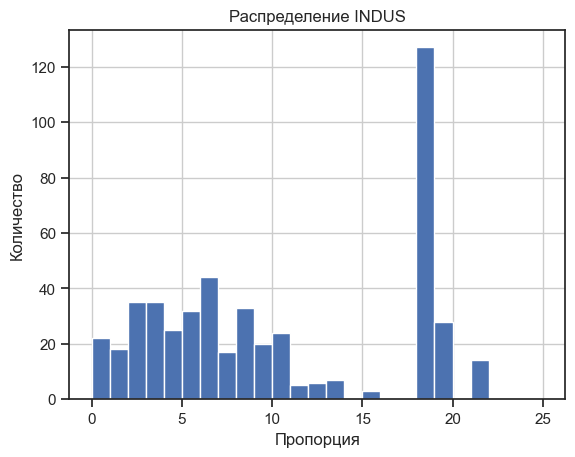

In [13]:
df = df.fillna(value={"INDUS": 0})

df.INDUS.hist(bins=range(26))
plt.title('Распределение INDUS')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

## Не удаляю пропуски в категориальном признаке "CHAS" в соответствии с описанием "CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)"

In [14]:
df = df.fillna(value={"CHAS": 2})

## Заполняю пропуски в численном признаке "AGE" в соответствии с описанием "AGE - proportion of owner-occupied units built prior to 1940"

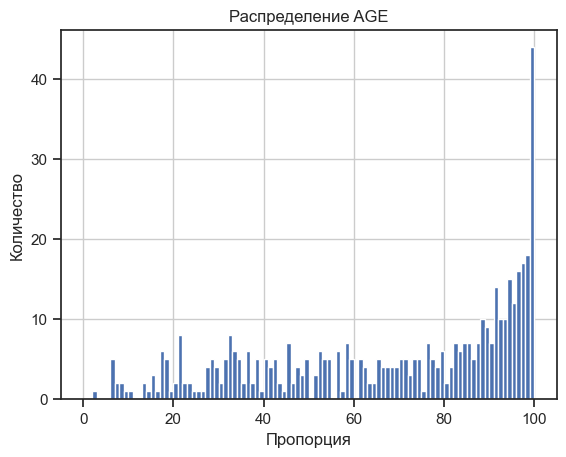

In [15]:
df.AGE.hist(bins=range(101))
plt.title('Распределение AGE')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

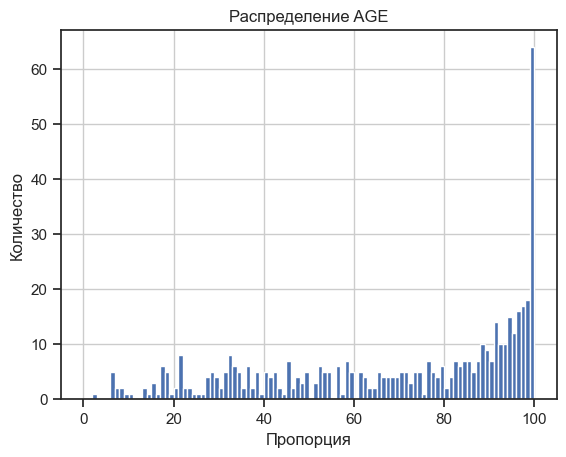

In [16]:
df = df.fillna(value={"AGE": 100})

df.AGE.hist(bins=range(101))
plt.title('Распределение AGE')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

## Заполняю пропуски в численном признаке "LSTAT" в соответствии с описанием "LSTAT - % lower status of the population"

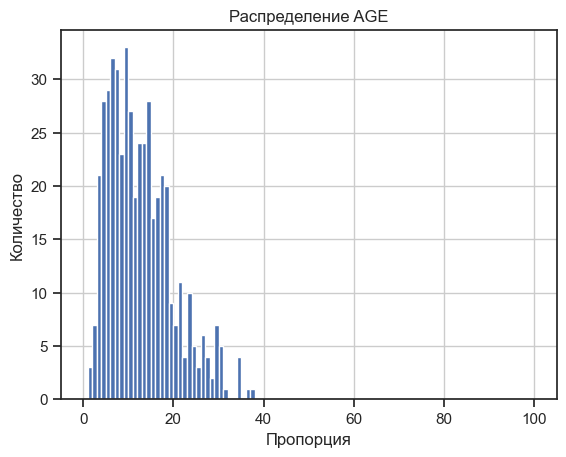

In [17]:
df.LSTAT.hist(bins=range(101))
plt.title('Распределение AGE')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

11.43


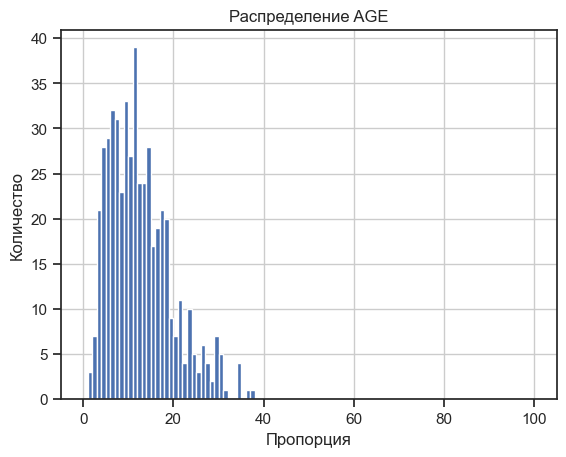

In [18]:
med = df.LSTAT.median()
print(med)
df = df.fillna(value={"LSTAT": int(med)})

df.LSTAT.hist(bins=range(101))
plt.title('Распределение AGE')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

In [19]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Преобразую категориальные признаки (one hot encoding)

In [20]:
for to_enc in ["CHAS"]:
    one_hot = pd.get_dummies(df[to_enc]).astype(int)
    del df[to_enc]
    df = df.join(one_hot)
df.columns = df.columns.map(str)
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,0.0,1.0,2.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1,0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1,0,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,0,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,0,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.00,36.2,1,0,0


## Провожу масштабирование численного признака AGE

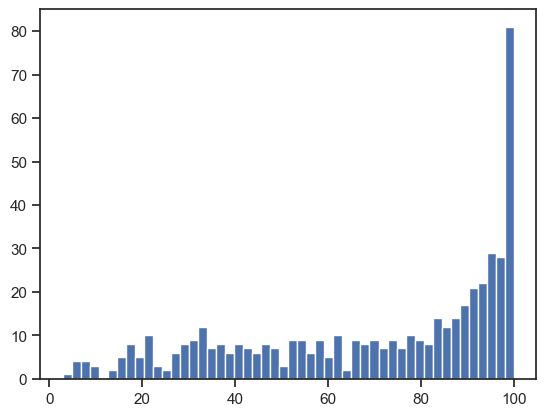

In [21]:
plt.hist(df['AGE'], 50)
plt.show()

### MinMaxScaler

In [22]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df[['AGE']])

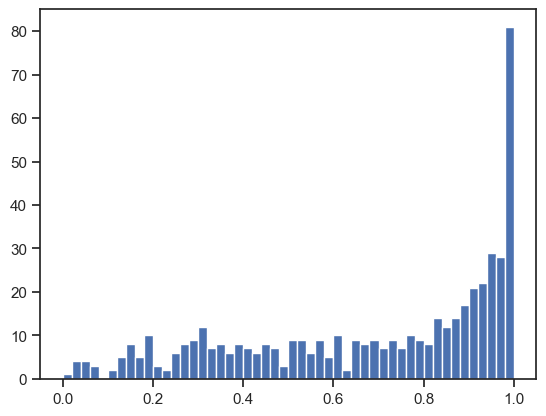

In [23]:
plt.hist(sc1_data, 50)
plt.show()

### StandardScaler

In [24]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(df[['AGE']])

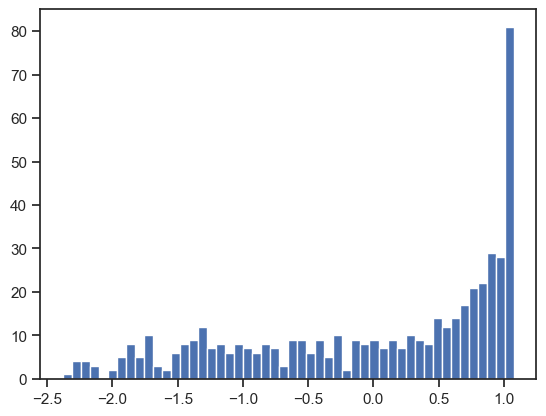

In [25]:
plt.hist(sc2_data, 50)
plt.show()